![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Supervised Learning Project Part B
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


In [148]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support,log_loss,mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind

# Part B

# DOMAIN: Banking, Marketing

## CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A  campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. 

## DATA DICTIONARY:
**1. Team: Team’s name**

**2. ID: Customer ID**

**3. Age: Customer’s approximate age.**

**4. CustomerSince: Customer of the bank since.** 

**5. HighestSpend: Customer’s highest spend so far in one transaction.**

**6. ZipCode: Customer’s zip code.**

**7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.**

**8. MonthlyAverageSpend: Customer’s monthly average spend so far.** 

**9. Level: A level associated to the customer which is masked by the bank as an IP.**

**10. Mortgage: Customer’s mortgage.** 

**11. Security: Customer’s security asset with the bank.**

**12. FixedDepositAccount: Customer’s fixed deposit account with the bank.** 

**13. InternetBanking: if the customer uses internet banking.**

**14. CreditCard: if the customer uses bank’s credit card.**

**15. LoanOnCard: if the customer has a loan on credit card.**

## PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

## STEPS AND TASK

## 1. Data Understanding and Preparation:** 

**A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables**. 

**B. Print shape and Column Names and DataTypes of both the Dataframe**

**C. Merge both the Dataframes on ‘ID’ feature to form a single DataFra**

**D. Change Datatype of below features to ‘Object’** 

**‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.**

**Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.**

## 2. Data Exploration and Analysis:**

**A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.** 

**B. Check the percentage of missing values and impute if required.** 

**C. Check for unexpected values in each categorical variable and impute with best suitable value.** 

**[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment]**

## 3. Data Preparation and model building** 

**A. Split data into X and Y.** 

**Recommended to drop ID & ZipCode. LoanOnCard is target Variable**

**B. Split data into train and test. Keep 25% data reserved for testing.** 

**C. Train a Supervised Learning Classification base model - Logistic Regression.**

**D. Print evaluation metrics for the model and clearly share insights.** 

**E. Balance the data using the right balancing technique.** 

**i. Check distribution of the target variable**

**ii. Say output is class A : 20% and class B : 80%**

**iii. Here you need to balance the target variable as 50:50.**

**iv. Try appropriate method to achieve the same.**

**F. Again train the same previous model on balanced data.** 

**G. Print evaluation metrics and clearly share differences observed.** 

## 4. Performance Improvement:**

**A. Train a base model each for SVM, KNN.**

**B. Tune parameters for each of the models wherever required and finalize a model.**

**(Optional: Experiment with various Hyperparameters - Research required)**

**C. Print evaluation metrics for final model.** 

**D. Share improvement achieved from base model to final model.** 

In [149]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

In [150]:
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [152]:
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


### Shape of dataframes

In [154]:
print(df1.shape)
print(df2.shape)

(5000, 8)
(5000, 7)


### Columns names of both dataframes

In [155]:
print(df1.columns)
print(df2.columns)

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


### Data types of both dataframes

In [156]:
print(df1.dtypes)
print(df2.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


### Combining both dataframes and storing  new dataframe in saperate variable

In [157]:
dfc=df1.merge(df2, on='ID')
dfc

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


**The new dataset has 5000 rows and 14 columns**

### Change Datatype of below features to ‘Object’

### ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

### Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.

In [158]:
dfc.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [159]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    dfc[i]=dfc[i].astype('category')

In [160]:
dfc.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

In [161]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


In [162]:
dfc.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


In [163]:
dfc.describe(include='all')

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,4980.0
unique,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,1472.0,NaN,2096.0,NaN,4478.0,4698.0,2984.0,3530.0,4500.0
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,NaN,1.937938,NaN,56.498800,NaN,NaN,NaN,NaN,NaN
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,NaN,1.747659,NaN,101.713802,NaN,NaN,NaN,NaN,NaN
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,NaN,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,NaN,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,NaN,2.500000,NaN,101.000000,NaN,NaN,NaN,NaN,NaN


In [164]:
dfc.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,5000.0,NaN,NaN,NaN,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,NaN,NaN,NaN,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,NaN,NaN,NaN,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,NaN,NaN,NaN,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,NaN,NaN,NaN,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,4.0,1.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyAverageSpend,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,3.0,1.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,2.0,0.0,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for null Values

In [165]:
dfc.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [166]:
dfc.isnull().sum() * 100 / len(dfc)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

*We have very less missing value so we will drop the missing records.**

In [167]:
dfc.dropna(axis=0,inplace=True)

In [168]:
dfc.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**Id column is not useful in model building so dropping that feature**

In [169]:
dfc.drop('ID',axis=1,inplace=True)

**5 Point summary**

In [170]:
dfc.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


# Univariate Analysis

**Distribution and outlier analysis of numerical variables**

**Age**

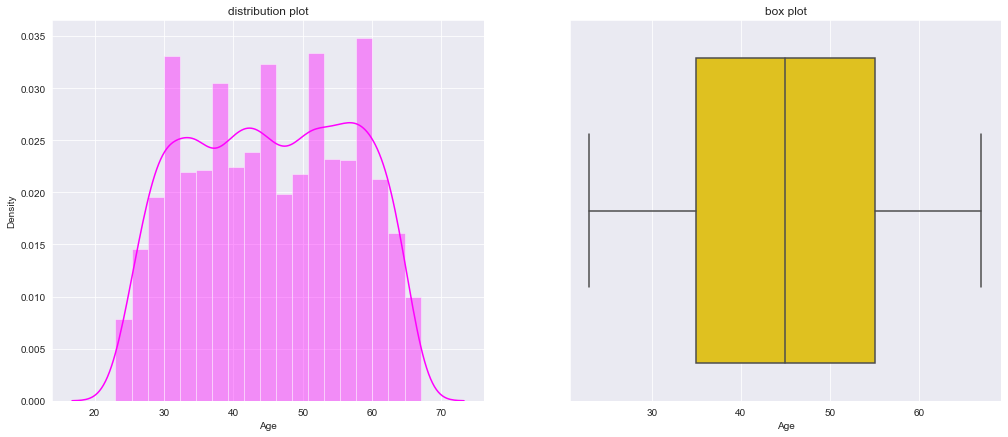

 Total Number of outliers in Age: 0


In [171]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(dfc['Age'], kde=True,color='fuchsia')
plt.subplot(1,2,2)
plt.title('box plot')
sns.boxplot(dfc['Age'],orient='h' ,color='gold')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(dfc['Age'],25),np.percentile(dfc['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfc['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

> **There is normality maintained in age column. Center area is little wider.**

> **People with age between 35 to 65 are more**

> **We have no outliers in this column**

**CustomerSince**

 Total Number of outliers in CustomerSince: 0


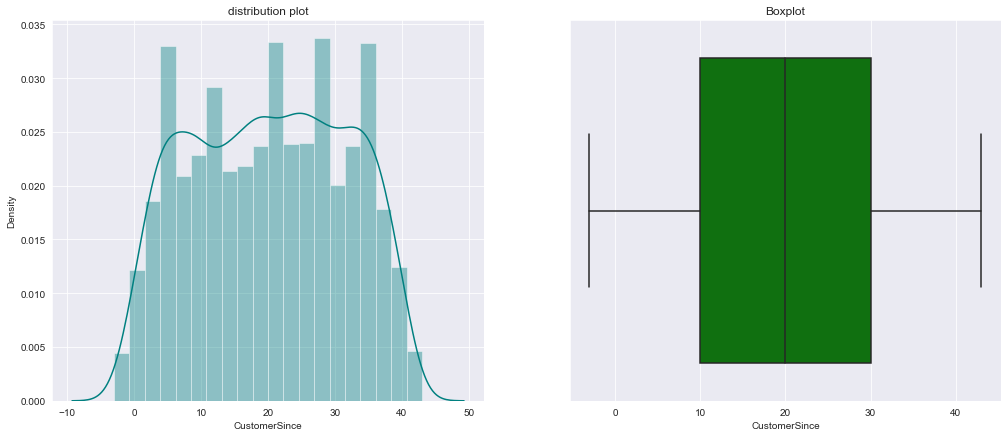

In [172]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(dfc['CustomerSince'],color='teal')
plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(dfc['CustomerSince'],color='Green')
#cheking for outliers
q25,q75 = np.percentile(dfc['CustomerSince'],25),np.percentile(dfc['CustomerSince'],75)
IQR = q75-q25
Threshold = IQR*1.5
lower,upper = q25-Threshold,q75+Threshold
outliers = [i for i in dfc['CustomerSince'] if i< lower or i>upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))

> **Most of the people became customer of bank between 10 to 30. Here the units are masked**

>**We have no outliers**

**HighestSpend**

 Total Number of outliers in HighestSpend: 96


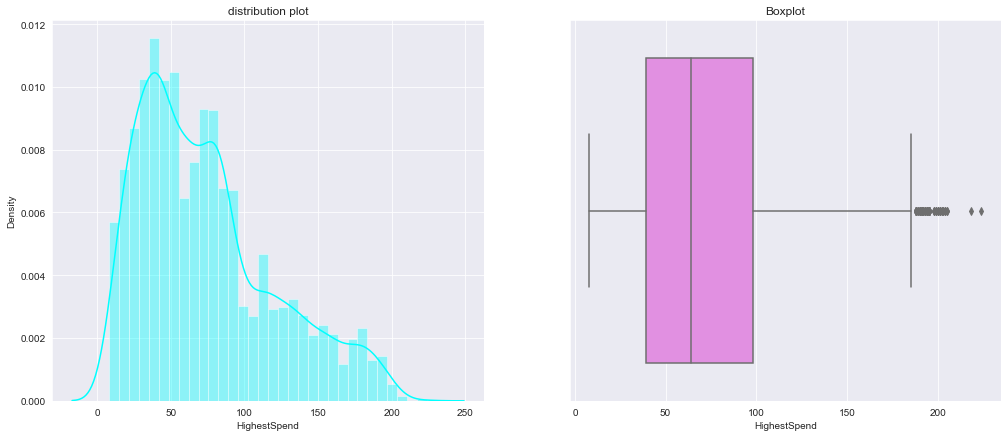

In [173]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(dfc['HighestSpend'],color='cyan')
plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(dfc['HighestSpend'],color='violet')
#checking count of outliers.
q25,q75=np.percentile(dfc['HighestSpend'],25),np.percentile(dfc['HighestSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfc['HighestSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in HighestSpend: {}'.format('\033[1m',len(Outliers)))

>**We can see positive skewness in the data**

> **In one transaction highest spend amount is between 45 to 100. Here the units are masked**

>**We can see 96 Outliers. Few customers spent more than 200 as well**

**ZipCode**

 Total Number of outliers in ZipCode: 1


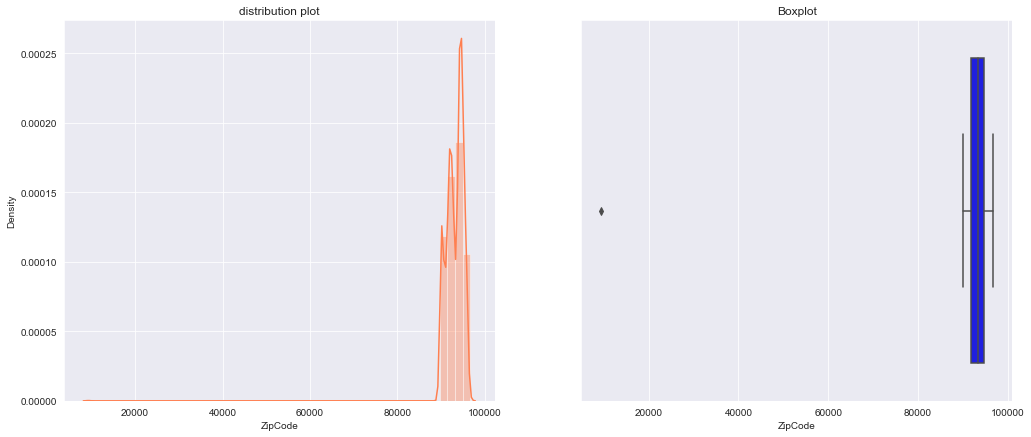

In [174]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(dfc['ZipCode'],color='coral')
plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(dfc['ZipCode'],color='blue')
#checking count of outliers.
q25,q75=np.percentile(dfc['ZipCode'],25),np.percentile(dfc['ZipCode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfc['ZipCode'] if i < lower or i > upper]
print('{} Total Number of outliers in ZipCode: {}'.format('\033[1m',len(Outliers)))

> **Most of the zipcodes are appeared once.**

> **There is no proper distribution**

> **This column does not add value to the model. We will drop during model building**

**MonthlyAverageSpend**

 Total Number of outliers in MonthlyAverageSpend: 324


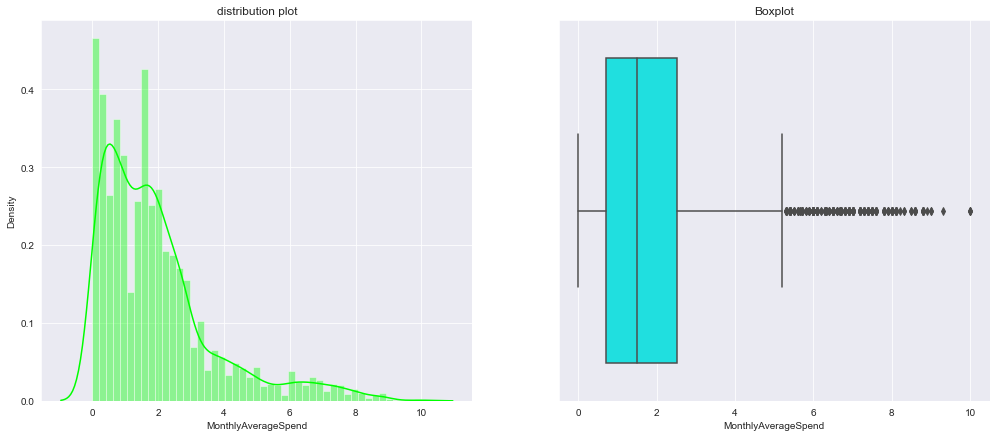

In [175]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(dfc['MonthlyAverageSpend'],color='lime')
plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(dfc['MonthlyAverageSpend'],color='aqua')
#checking count of outliers.
q25,q75=np.percentile(dfc['MonthlyAverageSpend'],25),np.percentile(dfc['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfc['MonthlyAverageSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyAverageSpend: {}'.format('\033[1m',len(Outliers)))

> **We can see huge positive skewness in the data**

> **Monthly average spend of the customer are mostly between 1 to 3(Units are masked)**

> **There is more number of outliers.This tells some customers spent huge amount as well**

**Mortgage**

 Total Number of outliers in Mortgage: 291


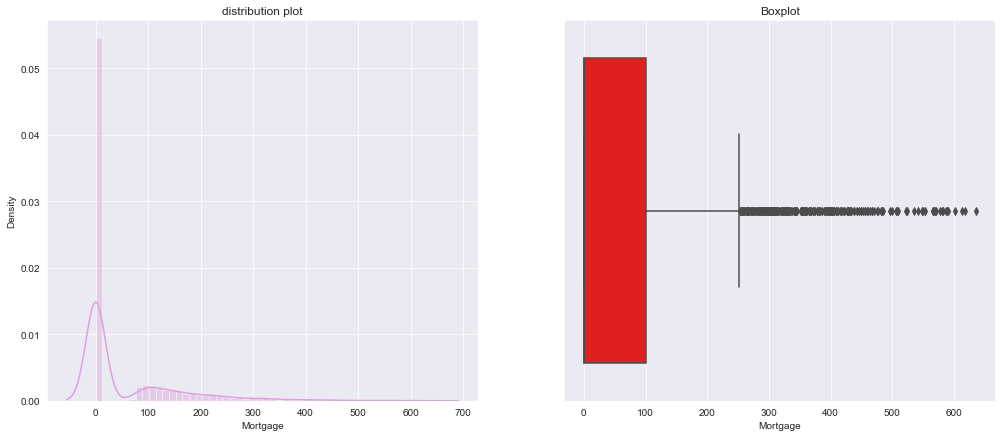

In [176]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(dfc['Mortgage'],color='plum')
plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(dfc['Mortgage'],color='red')
#checking count of outliers.
q25,q75=np.percentile(dfc['Mortgage'],25),np.percentile(dfc['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfc['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))

> **Most of cases we have zero as value this tell most of the cutomer doest have mortage.**

> **we can see there is no proper distribution.**

### Distribution of categorical variables

**HiddenScore**

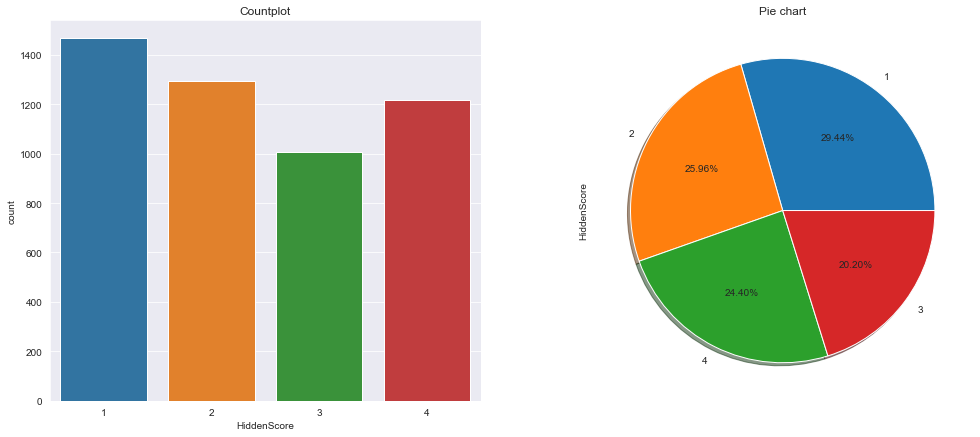

In [177]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(dfc['HiddenScore'])
plt.subplot(1,2,2)
plt.title('Pie chart')
dfc['HiddenScore'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');


**We can see nearly equal distribution of each category**

**Level**

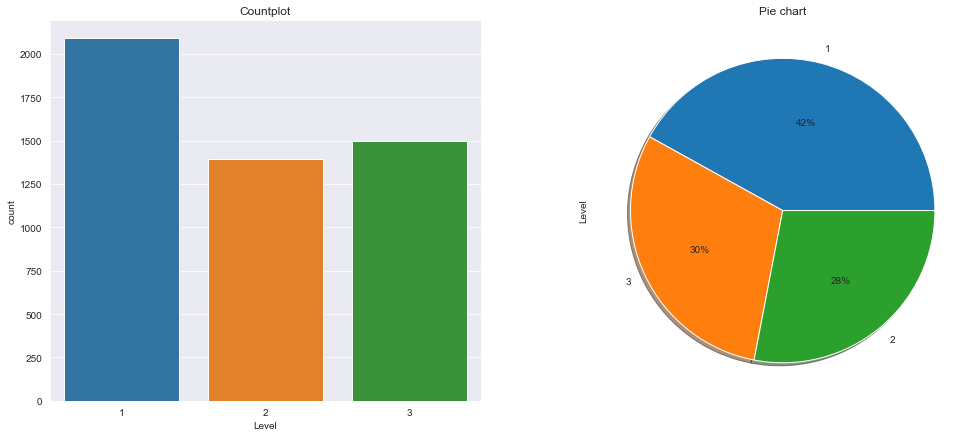

In [178]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(dfc['Level'])
plt.subplot(1,2,2)
plt.title('Pie chart')
dfc['Level'].value_counts().plot.pie(shadow=True,autopct='%.0f%%');

> **Level 2 and 3 has nearly equal distribution**

> **Level 1 customers are more compared to others**

**FixedDepositAccount**

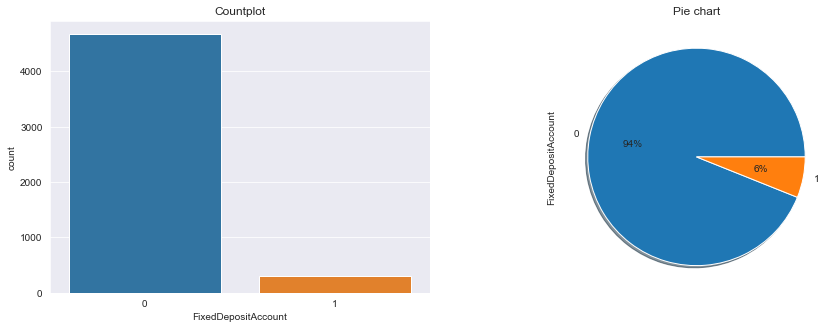

In [179]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(dfc['FixedDepositAccount'])
plt.subplot(1,2,2)
plt.title('Pie chart')
dfc['FixedDepositAccount'].value_counts().plot.pie(shadow=True,autopct='%.0f%%');

> **We can see 94% of customers does not have fixed deposit account**

**Security**

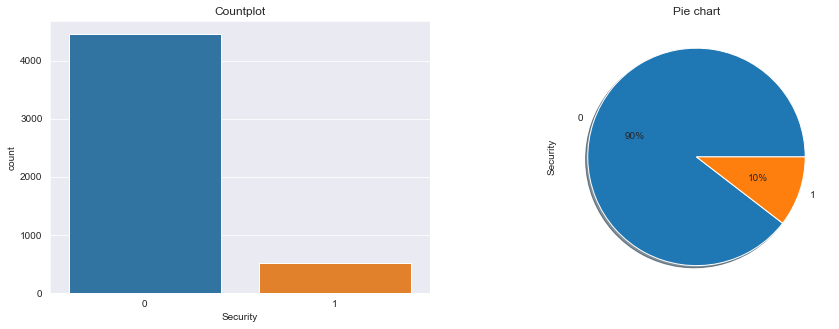

In [180]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(dfc['Security'])
plt.subplot(1,2,2)
plt.title('Pie chart')
dfc['Security'].value_counts().plot.pie(shadow=True,autopct='%.0f%%');

**Nearly 90% of the customers uses not security protocol**

**internetBanking**

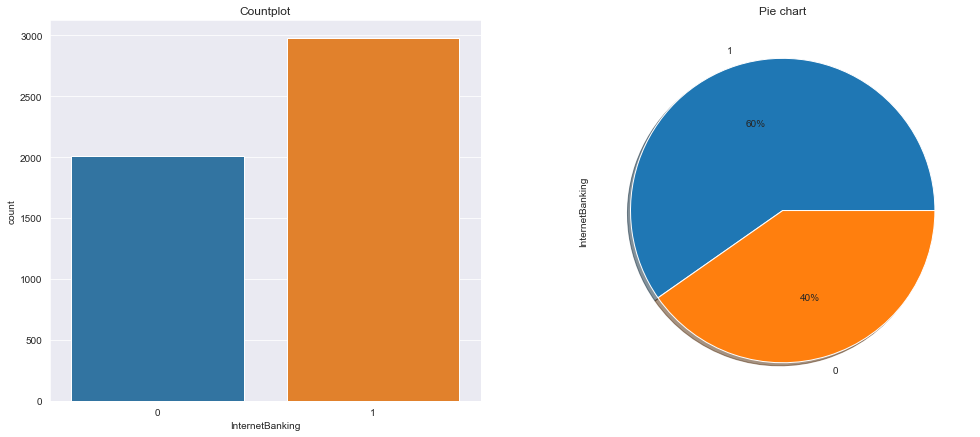

In [517]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(dfc['InternetBanking'])
plt.subplot(1,2,2)
plt.title('Pie chart')
dfc['InternetBanking'].value_counts().plot.pie(shadow=True,autopct='%.0f%%');

> **60 % of people uses internet banking**

**LoanOnCard**

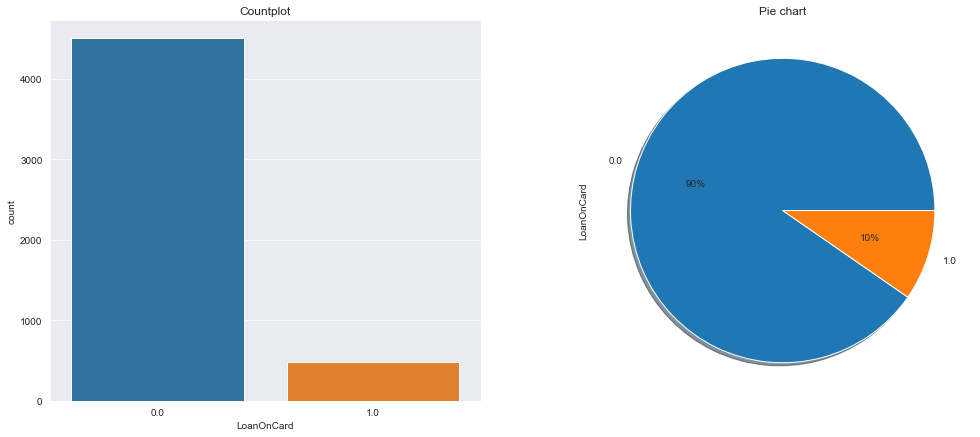

In [521]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(dfc['LoanOnCard'])
plt.subplot(1,2,2)
plt.title('Pie chart')
dfc['LoanOnCard'].value_counts().plot.pie(shadow=True,autopct='%.0f%%');

> **We can see 90% of people does not have loan on credit card**

**CreditCard**

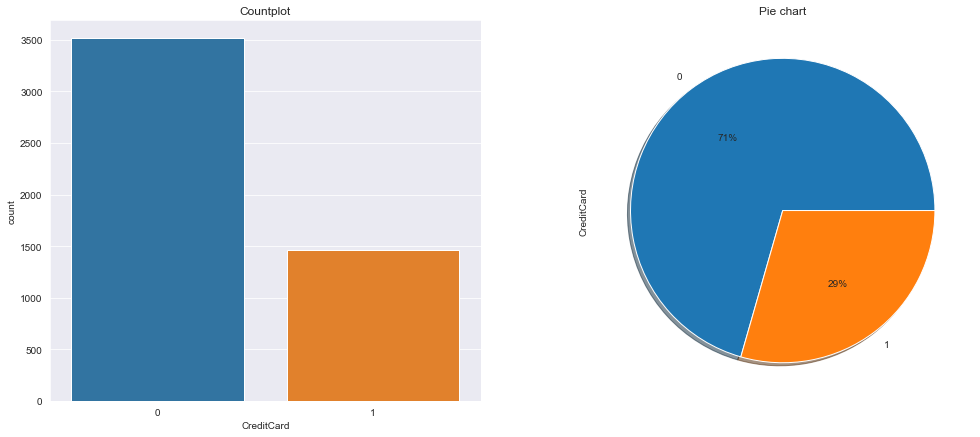

In [183]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(dfc['CreditCard'])
plt.subplot(1,2,2)
plt.title('Pie chart')
dfc['CreditCard'].value_counts().plot.pie(shadow=True,autopct='%.0f%%');

> **71 % of people uses bank's credit card**

# **BiVariate Analysis** 

**Numerical vs Category**

**LoanOnCard vs CustomerSince**

**LoanOnCard vs Age**

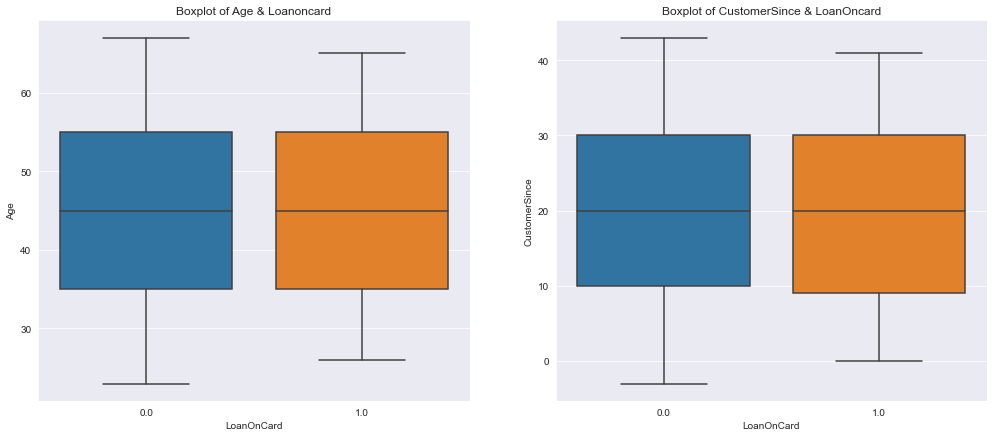

In [524]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Boxplot of Age & Loanoncard')
sns.boxplot(x='LoanOnCard', y='Age', data = dfc );
plt.subplot(1,2,2)
plt.title('Boxplot of CustomerSince & LoanOncard')
sns.boxplot(x='LoanOnCard',y='CustomerSince', data=dfc );


> **Age distribution is nearly equal for both loan holders and non-loan holders**

> **Customer of the bank since has equal distribution on loan holders and non-loan holders.**

**LoanOnCard vs HighestSpend**

**LoanOnCard vs MonthlyAverageSpend**

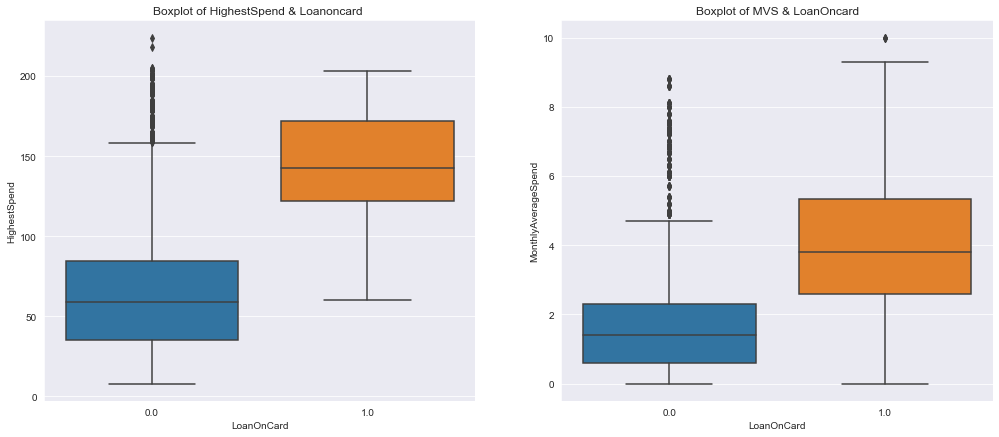

In [185]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Boxplot of HighestSpend & Loanoncard ')
sns.boxplot(x='LoanOnCard', y='HighestSpend', data = dfc );
plt.subplot(1,2,2)
plt.title('Boxplot of MVS & LoanOncard')
sns.boxplot(x='LoanOnCard',y='MonthlyAverageSpend', data=dfc );

> **It is evident that people having loan on card spends more than who doesn't have**

>**Some customer who does not have loan also spends more sometimes.**

> **Monthly average spend is more for loan holders**

> **This column is directly proportional to highest spend**

**Mortgage**

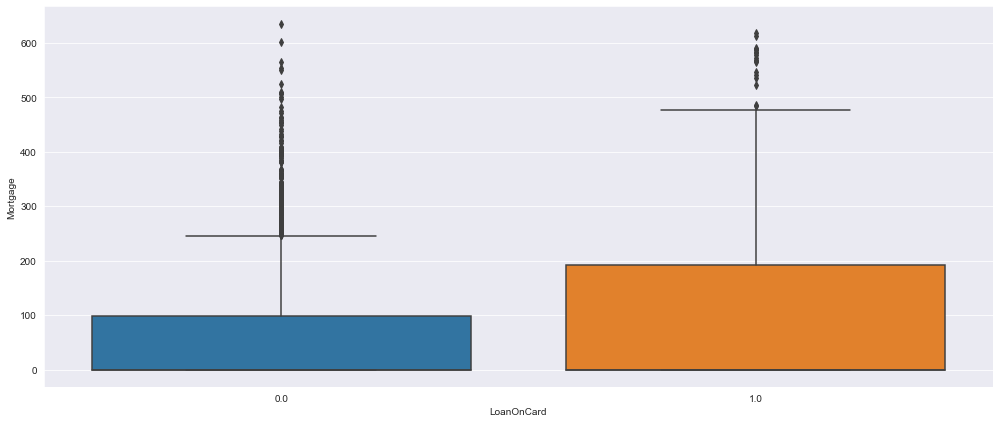

In [186]:
plt.figure(figsize=(17,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= dfc)
plt.show()

> **Mortage value is high for loan holders**

> **We can see extreme value in both the cases**

**Numerical vs Numerical**

**MonthlyAverageSpend vs HighestSpend**

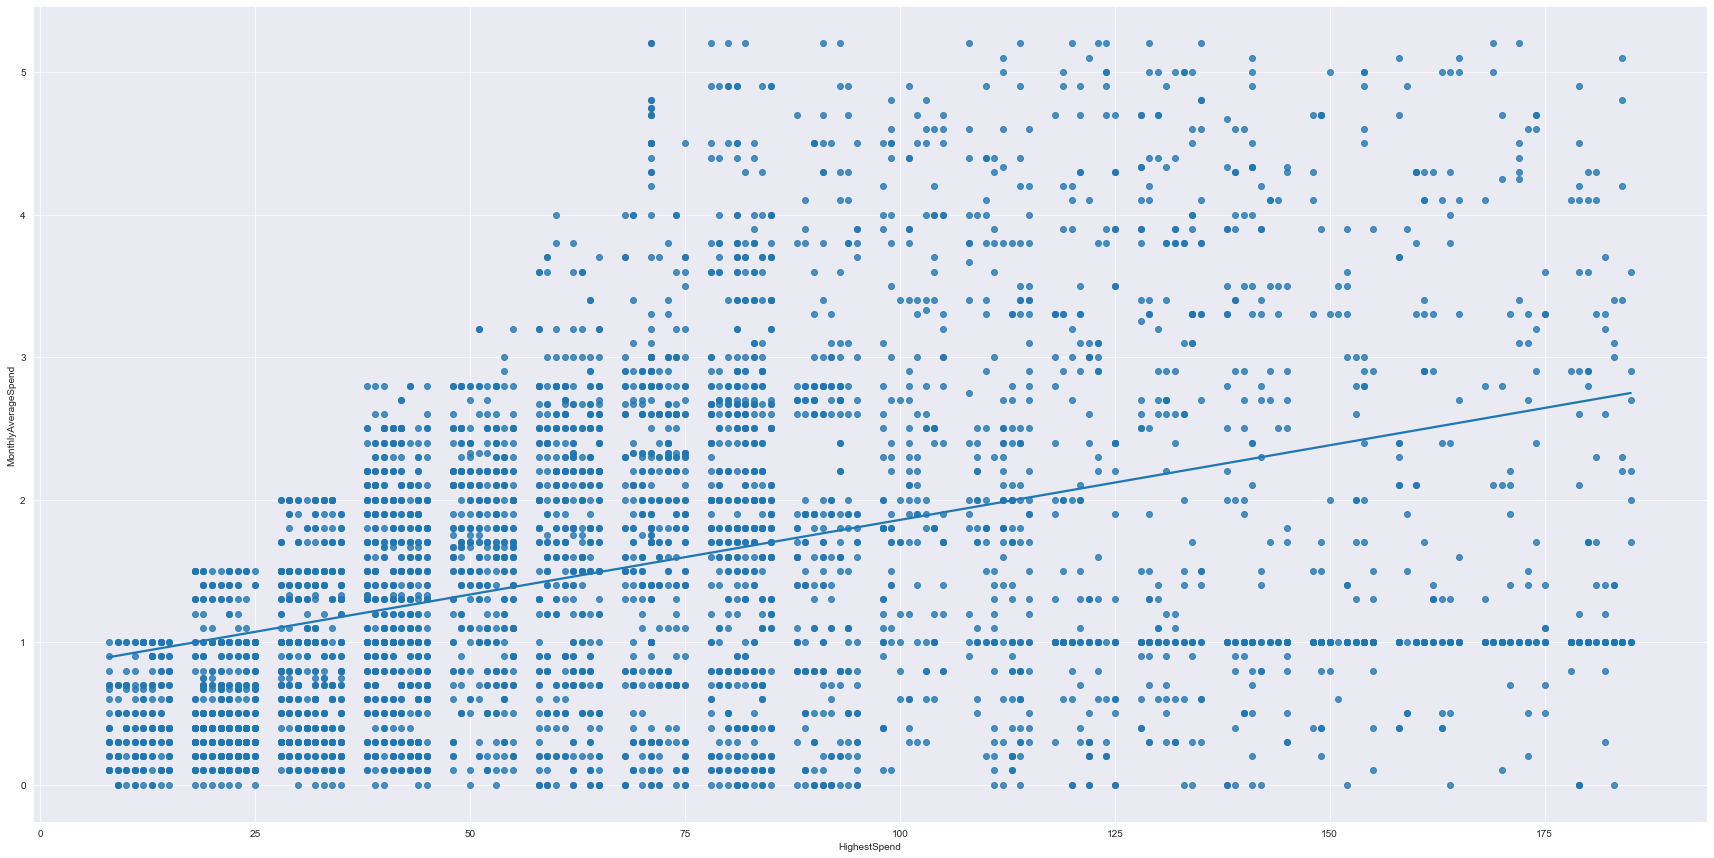

In [527]:
figure = plt.figure(figsize=(30,15))
sns.regplot('HighestSpend',y='MonthlyAverageSpend',data=dfc,ci=False)
plt.show;

> **There is clear linear relationship between Monthly average spend and highest spend.**

**Age vs MonthlyAverageSpend**

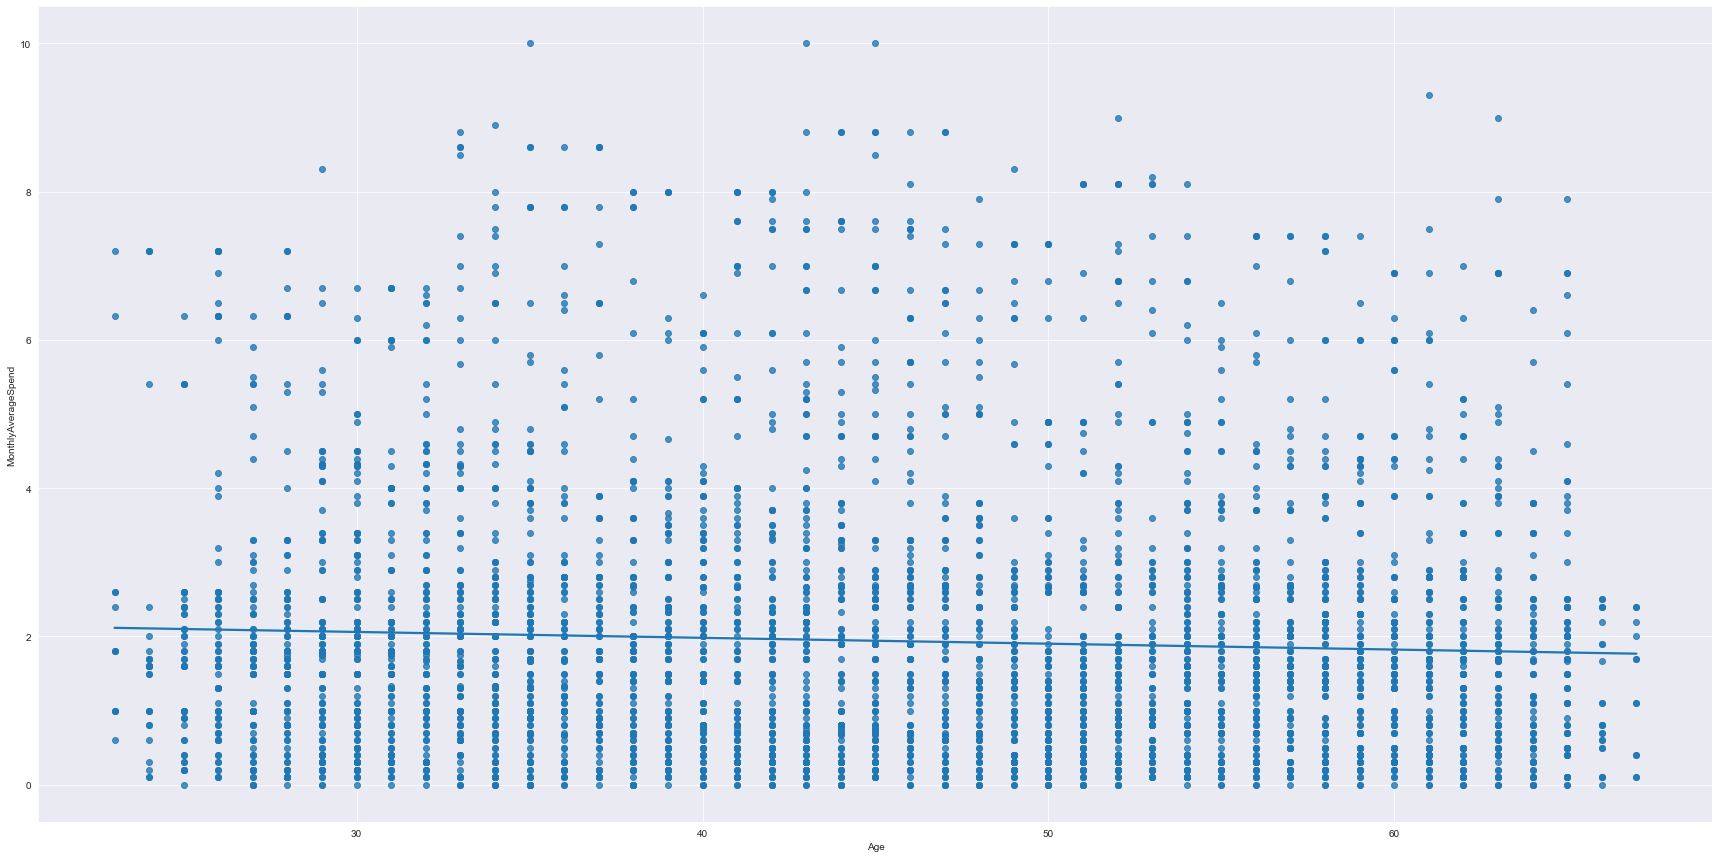

In [188]:
figure = plt.figure(figsize=(30,15))
sns.regplot('Age',y='MonthlyAverageSpend',data=dfc,ci=False)
plt.show;

> **Age does not have any relationship with spend.**

**CustomerSince vs MonthlyAverageSpend**

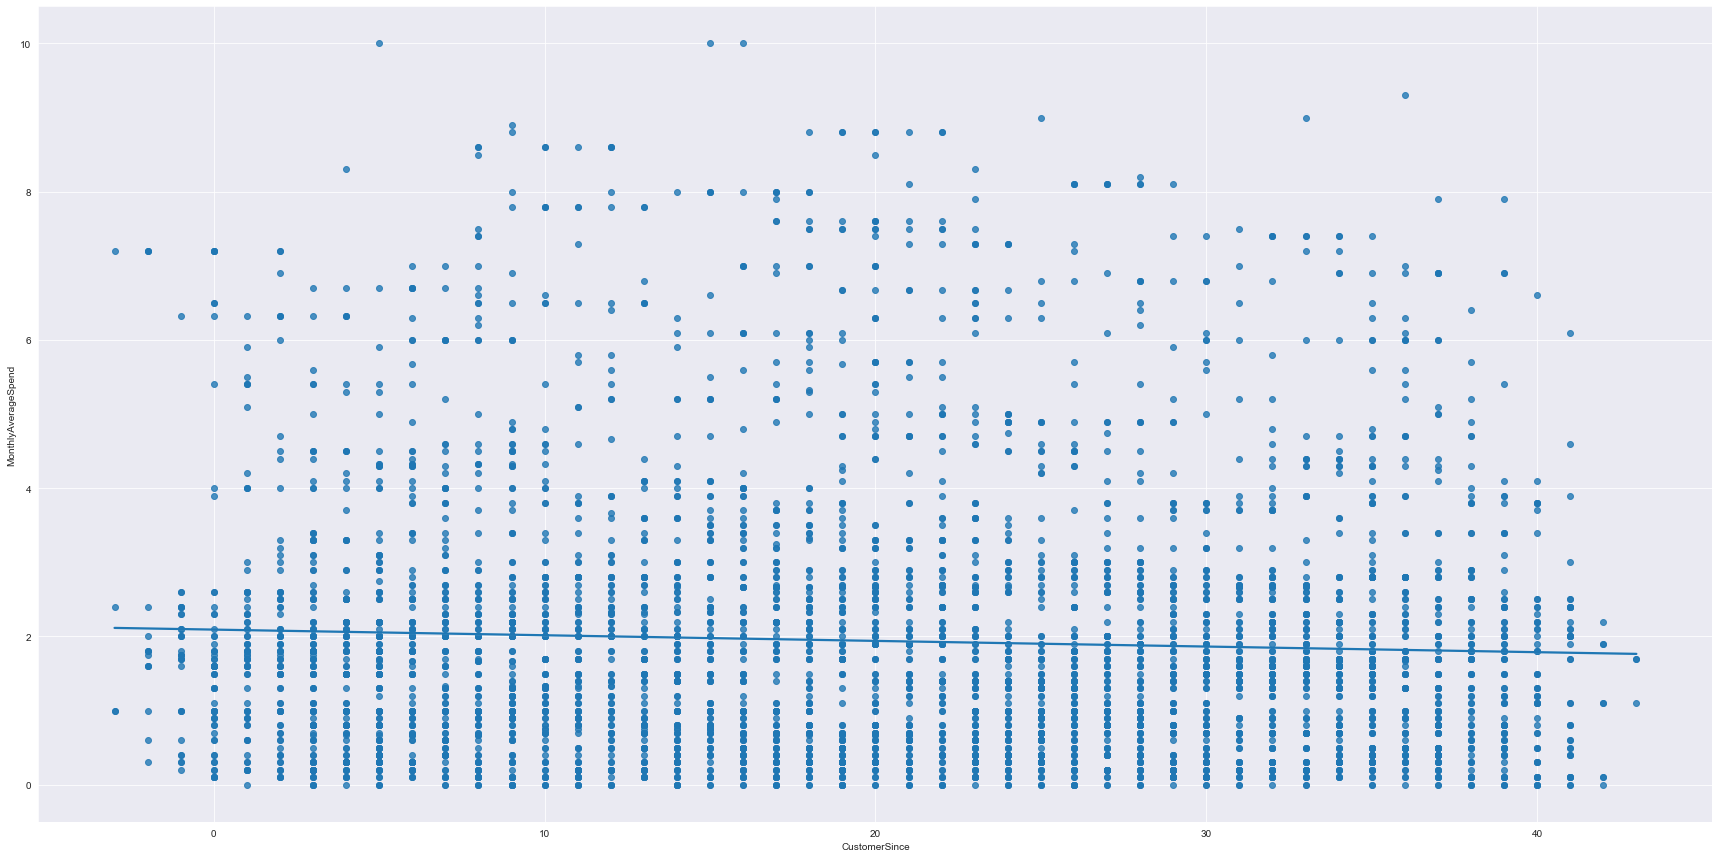

In [189]:
figure = plt.figure(figsize=(30,15))
sns.regplot('CustomerSince',y='MonthlyAverageSpend',data=dfc,ci=False)
plt.show;

> **Customer period is not dependent on spend**

**Mortgage vs MonthlyAverageSpend**

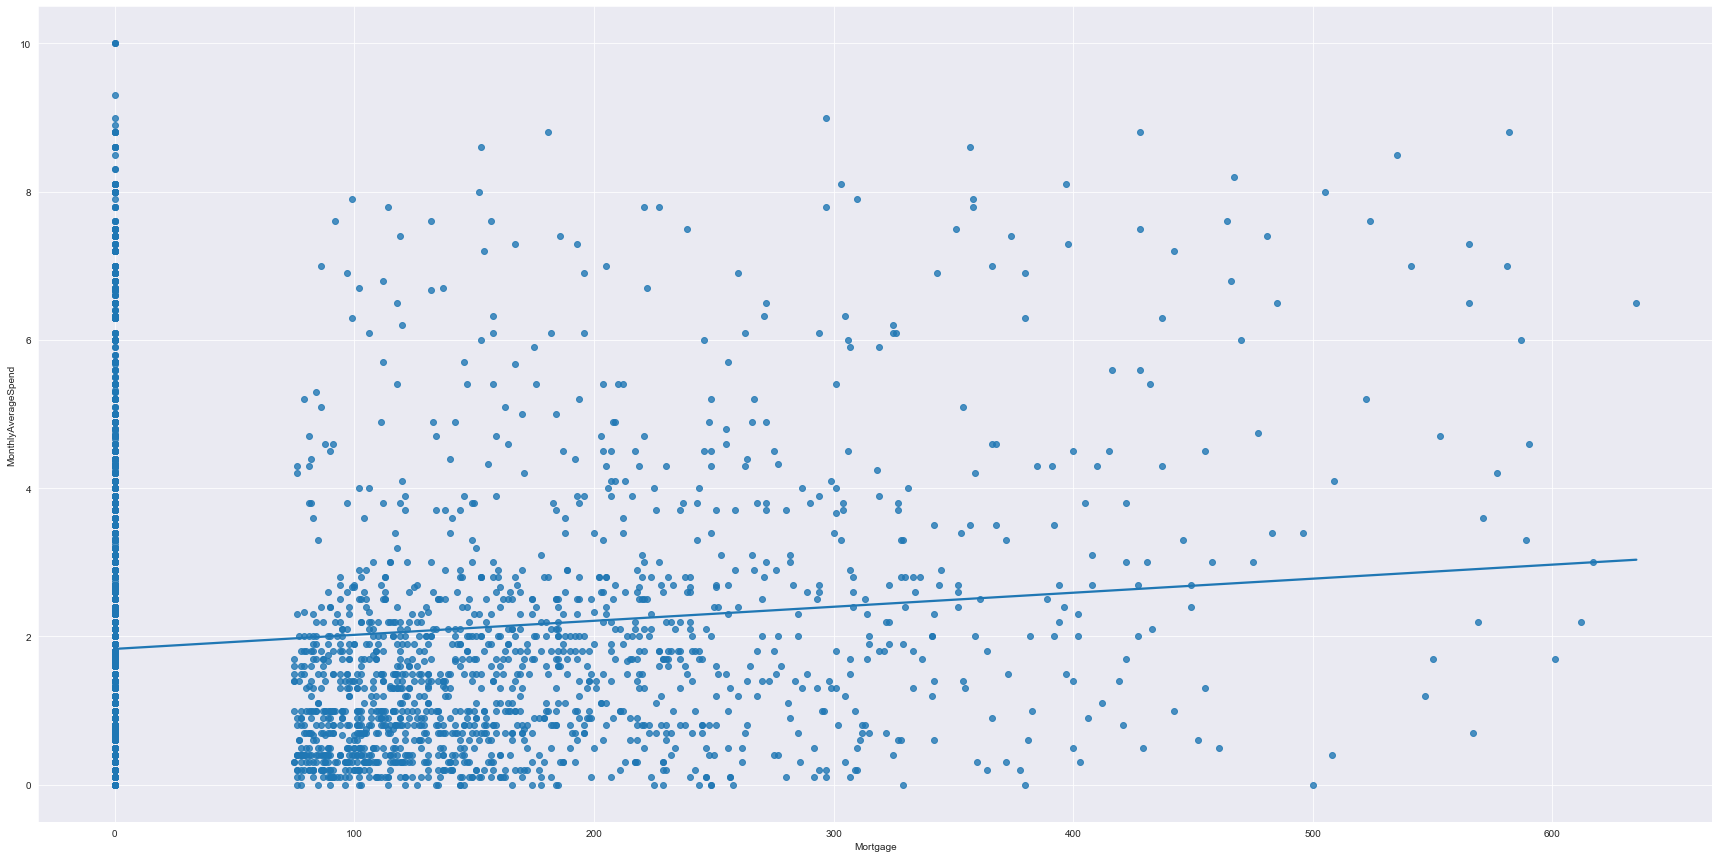

In [190]:
figure = plt.figure(figsize=(30,15))
sns.regplot('Mortgage',y='MonthlyAverageSpend',data=dfc,ci=False)
plt.show;

**Mortgage value has slight relationship with monthlyspend**

**Hidden Score vs Loan on card**

**Level vs Loan on card**

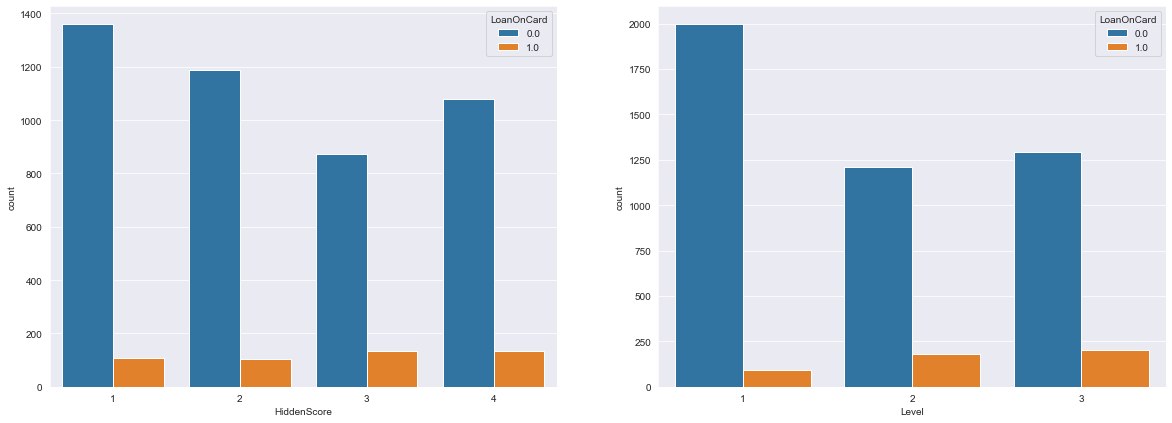

In [191]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(dfc['HiddenScore'],hue=dfc['LoanOnCard'])
plt.subplot(1,2,2)
sns.countplot(dfc['Level'],hue=dfc['LoanOnCard'])
plt.show;

> **Hidden score is more for non-loan holders**

> **Level 1 has minimum number of loan holders**

> **Loan holders in Level 2 and 3 are nearly equal**

**Security vs Loan on card**

**FixedDepositAccount vs  Loanoncard**

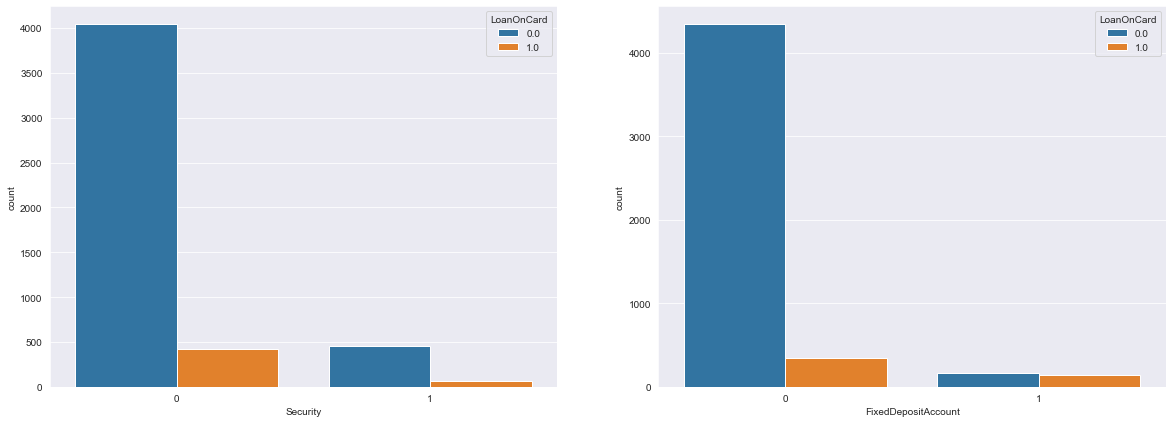

In [192]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(dfc['Security'],hue=dfc['LoanOnCard'])
plt.subplot(1,2,2)
sns.countplot(dfc['FixedDepositAccount'],hue=dfc['LoanOnCard'])
plt.show;

> **It is surprisingly to see more customers those who have loan does not have any security**

> **Security of loan holders are very less**

> **Count of non loan holders are more**

#  Multivariate Analysis

<Figure size 1440x576 with 0 Axes>

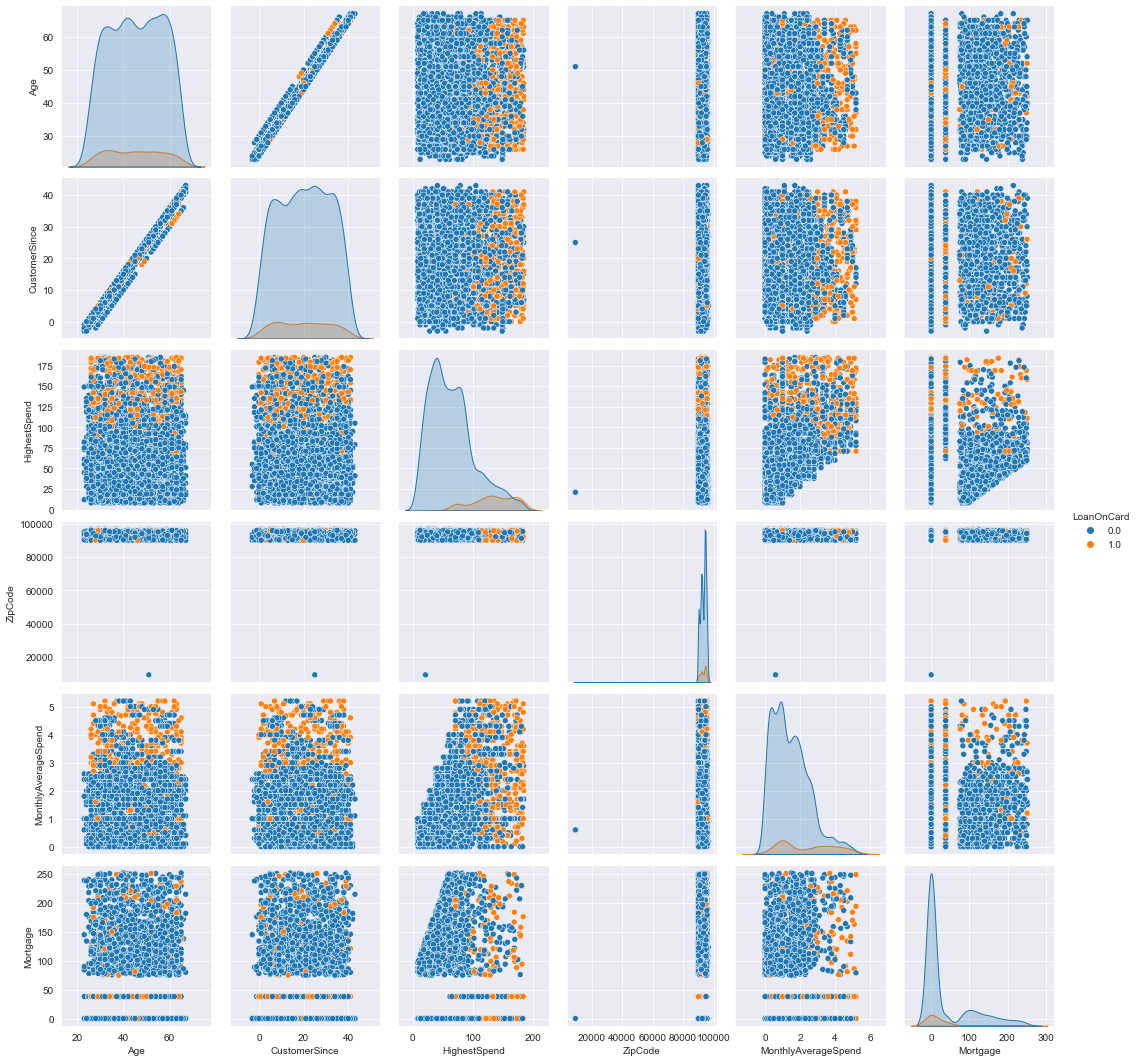

In [505]:
plt.figure(figsize=(20,8));
sns.pairplot(dfc,hue='LoanOnCard')
plt.show;

> **customersince and age have some +ve relationship**

> **higestspend and monthlyspend have some +ve relationship**

> **mortgage and monthlyspend have some +ve relationship**


**Correlation among pairs of continuous variables**

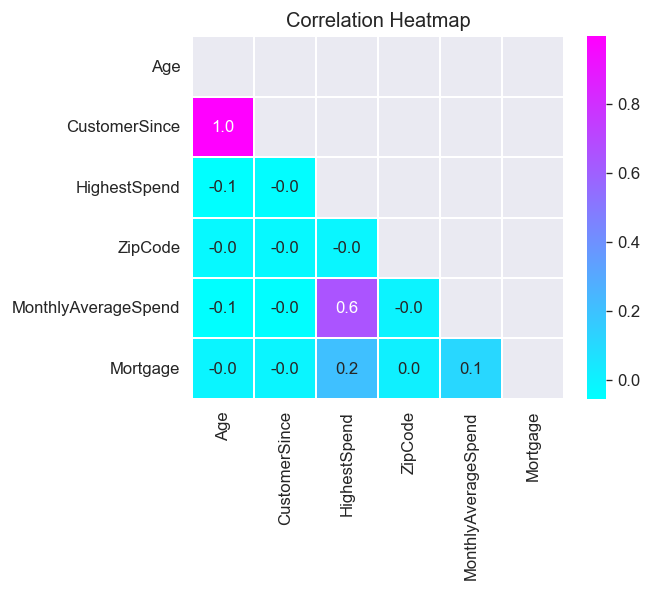

In [194]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(dfc.corr()))
sns.heatmap(dfc.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap='cool')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

> **Age and customer since has correlation as 1. Any one can be used for the model.**

> **Highest spend has large correlation with monthly average spend**

> **Mortage and highest spend has little correlation**

> **Rest of the variables does not have any relation**

# Hypothesis Testing

In [195]:
class_summary=dfc.groupby('LoanOnCard') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
0,0.0,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1,1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


**Highest Spend mean values differ huge for loan and non-loan customer**

**Age mean is equal for each class**

**We can check by statistical test**

In [196]:
col=list(dfc.select_dtypes(include=['int64','float64']).columns)

**Here we will be using two-sample unpaired t-test**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [197]:
for i in col:
    x = np.array(dfc[dfc.LoanOnCard == 0][i]) 
    y = np.array(dfc[dfc.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.5694160158774422
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5855242526574542
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:1.527529731162187e-227
 Rejecting Null Hypothesis.HighestSpend of Loan holders and non-Loan holders are not same


 P_Value:0.9920253364424511
 Fail to Reject Null Hypothesis.ZipCode of Loan holders and non-Loan holders are  same


 P_Value:2.414409993123105e-77
 Rejecting Null Hypothesis.MonthlyAverageSpend of Loan holders and non-Loan holders are not same


 P_Value:1.3389598194359617e-10
 Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




**We can see Age,Customer since and zip code does not have effect on target variable. So dropping this column before building model**

**Statistical Testing of categorical features with target variable**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**       (loan oo card)

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**(loan oo card)

**Similarly we will check for categorical columns**

In [198]:
cat_col=list(dfc.select_dtypes(include=['category']).columns)

In [199]:
for i in cat_col:
    crosstab=pd.crosstab(dfc['LoanOnCard'],dfc[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in HiddenScore Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in LoanOnCard Feature for different category of target va

**We can see credit card,internet banking and security does not have significant difference in target variable.So dropping this column before building model**

# **Outlier Analysis**

In [200]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

**We are imputing outiers with mean**

In [201]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(dfc[c],25),np.percentile(dfc[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in dfc[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = dfc.loc[(dfc[c] >= lower) & (dfc[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    dfc[c]=np.where(dfc[c]>upper,mean,dfc[c])
    dfc[c]=np.where(dfc[c]<lower,mean,dfc[c])
    Outliers=[i for i in dfc[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




#  **Target Imbalance**

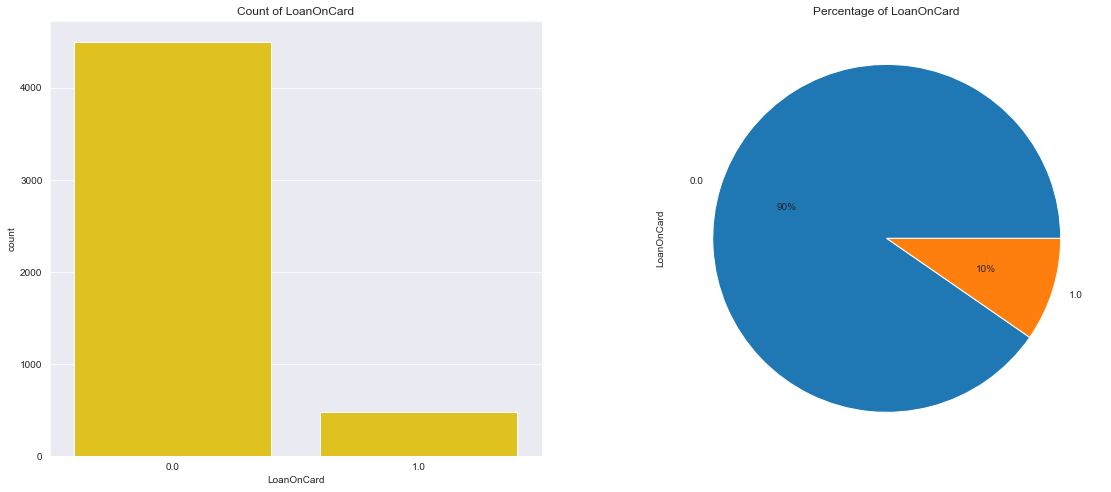

In [202]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.title('Count of LoanOnCard')
sns.countplot(dfc['LoanOnCard'],color='Gold')

plt.subplot(1,3,2)
plt.title('Percentage of LoanOnCard')
dfc['LoanOnCard'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

***There is imbalance in Target variable with almost 90% data in 0 and 10% data in 1. Let us try to undersample it using sample option in Padas***

# Perform train-test split. before sampling 

In [474]:
X=dfc.drop('LoanOnCard', axis=1)
y=dfc['LoanOnCard']

In [475]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Logistic regression

Accuracy score Traing dataset:0.95
Accuracy score Traing dataset:0.95
Accuracy score:0.95
Log loss:1.83
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1114
         1.0       0.83      0.63      0.71       131

    accuracy                           0.95      1245
   macro avg       0.89      0.81      0.84      1245
weighted avg       0.94      0.95      0.94      1245



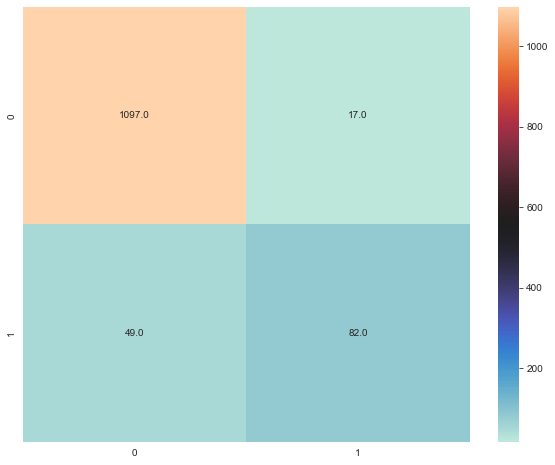

In [476]:
#Try with dataset before sampling
dfc_no_sample = dfc.drop(['Security','InternetBanking','CreditCard','Age','CustomerSince','ZipCode'], axis=1)
X1=dfc_no_sample.drop('LoanOnCard', axis=1)
y1=dfc_no_sample['LoanOnCard']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=20)
lr = LogisticRegression()
lr.fit(X_train1, y_train1)
pred=lr.predict(X_test1)

print("Accuracy score Traing dataset:{:.2f}".format(lr.score(X_train1, y_train1)))
print("Accuracy score Traing dataset:{:.2f}".format(lr.score(X_test1, y_test1)))
print("Accuracy score:{:.2f}".format(accuracy_score(y_test1, pred)))
print("Log loss:{:.2f}".format(log_loss(y_test1, pred)))
figure = plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test1, pred), annot=True,cmap ='icefire',fmt='.1f')
print(classification_report(y_test1,pred))

**95% accuracy on training set and 95% accuracy on test set.**

**Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good**

**Here you can see model is poor in predicting class 1 compared to class 0**

**Accuracy is good but in this case we need to look on recall value**

**Here Recall tells that only 63% class 1 is predicted correctly from actual values**

**We dont have enough sample of class 1 to train the model.**

**We will do the sampling and check how recall values improves in this case.**

# Data pre-processing: 

### Segregate predictors vs target attributes

In [477]:
dfc['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [478]:
sample_data=pd.concat([dfc[dfc['LoanOnCard']==0].sample(480),dfc[dfc['LoanOnCard']==1]])
dfc_sample = sample_data.drop(['Security','InternetBanking','CreditCard','Age','CustomerSince','ZipCode'], axis=1)
X=dfc_sample.drop('LoanOnCard', axis=1)
y=dfc_sample['LoanOnCard']


In [479]:
X.shape

(960, 6)

In [480]:
y.shape

(960,)

In [481]:
y.value_counts()

0.0    480
1.0    480
Name: LoanOnCard, dtype: int64

***imbalance in the dataset has been handled with downsampling thing data. there are other techiniques like SMOTE oversampling & downsampling techinques ect. i have planned to go with manual sampling***

# Perform train-test split. after sampling

In [482]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)



Accuracy Score of Training Data:  0.8763888888888889

Accuracy Score of Test Data:  0.8875

Classification Report of Logistic Regression Model:
                precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       127
         1.0       0.86      0.91      0.88       113

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240


Mean Absolute Error of Logistic Regression:
 0.1125

Confusion Matrix of Logistic Regression: 
 [[110  17]
 [ 10 103]]


<AxesSubplot:>

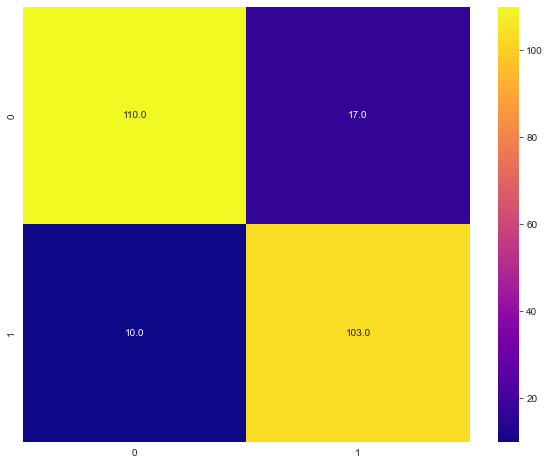

In [483]:
modelLR = LogisticRegression()

#fitting the model
modelLR.fit(X_train, y_train)

#predicting
y_predictLR = modelLR.predict(X_test)


cfm_LR = confusion_matrix(y_test, y_predictLR)
# evaluate accuracy
print('\n\nAccuracy Score of Training Data: ', modelLR.score(X_train, y_train))
modelLR_score = accuracy_score(y_test, y_predictLR)
print('\nAccuracy Score of Test Data: ', modelLR_score)
print('\nClassification Report of Logistic Regression Model:\n ', classification_report(y_test, y_predictLR))
print('\nMean Absolute Error of Logistic Regression:\n', mean_absolute_error(y_test, y_predictLR))
print('\nConfusion Matrix of Logistic Regression: \n', cfm_LR)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm_LR, annot = True, cmap = 'plasma', fmt = '.1f')

**Observations:**
1. Though the accuracy score is reduced to 89%, we can say that the model is peforming well in balaced data.
2. If we see the classification report.  
    a. Precission : we are predicting 92% of 0 out of over all no Loan on card & 86% of times as Loan on card out of over all dataset.  
    b. Recall : out of over all dataset, our model can predict 87% of times correctly as No loan on card & 91% of times as Loan on card correctly.  
    Comparing with the imbalanced dataset, the balanced dataset perform better with high precission value. However, there are room for improvements to reduce the False Negative. 
    Lets try with different modeling technique

In [485]:
precision_LR, recall_LR, f1_score_LR, support = precision_recall_fscore_support(y_test, y_predictLR, average = 'macro')
print('Precision Score :', '%0.2f' % precision_LR) 
print('Recall Score :', '%0.2f' % recall_LR)
print('F1-Score:', '%0.2f' % f1_score_LR)
print('Accuracy Score :','%0.2f' % modelLR_score)

Precision Score : 0.89
Recall Score : 0.89
F1-Score: 0.89
Accuracy Score : 0.89


# KNN Classifier

> **finding optimal k value for knn**

In [492]:
# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [493]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  3


Accuracy Score of Training Data:  0.9277777777777778

Accuracy Score of Test Data:  0.875

Classification Report of KNN Model:
                precision    recall  f1-score   support

         0.0       0.92      0.83      0.88       127
         1.0       0.83      0.92      0.87       113

    accuracy                           0.88       240
   macro avg       0.88      0.88      0.87       240
weighted avg       0.88      0.88      0.88       240


Mean Absolute Error of KNN:
 0.125

Confusion Matrix of KNN:
 [[106  21]
 [  9 104]]


<AxesSubplot:>

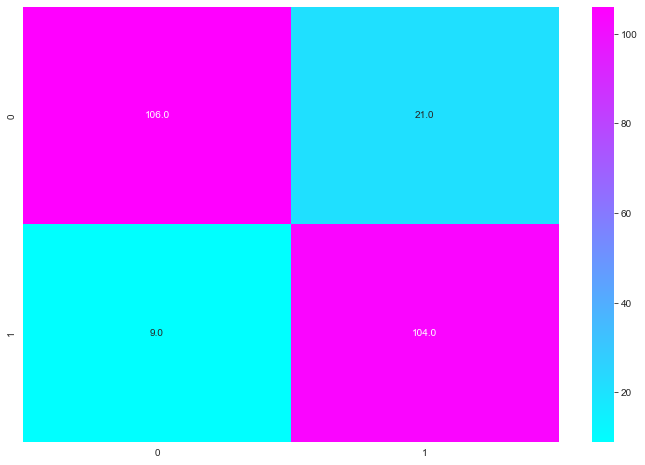

In [494]:
#Using optimal_k from above as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predictKNN = knn.predict(X_test)

# evaluate accuracy
print('Accuracy Score of Training Data: ', knn.score(X_train, y_train))
modelKNN_score = accuracy_score(y_test,y_predictKNN)

cfm_KNN = confusion_matrix(y_test, y_predictKNN)
print('\nAccuracy Score of Test Data: ', modelKNN_score)
print('\nClassification Report of KNN Model:\n ', classification_report(y_test, y_predictKNN))
print('\nMean Absolute Error of KNN:\n', mean_absolute_error(y_test, y_predictKNN))
print('\nConfusion Matrix of KNN:\n', cfm_KNN)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_KNN, annot = True, cmap = 'cool', fmt = '.1f')

**Observations:**
1. The accuracy score is 88%, we can say that the model is peforming well in balanced data.
2. If we see the classification report.  
    a. Precission : we are predicting 92% of 0 out of over all no Loan on card & 83% of times as Loan on card out of over all dataset.  
    b. Recall : out of over all dataset, our model can predict 83% of times correctly as No loan on card & 92% of times as Loan on card correctly.  
       Lets try with different modeling technique

In [495]:
precision_KNN, recall_KNN, f1_score_KNN, support = precision_recall_fscore_support(y_test, y_predictKNN, average = 'macro')
print('Precision Score :', '%0.2f' % precision_KNN)
print('Recall Score :', '%0.2f' % recall_KNN)
print('F1-Score :', '%0.2f' % f1_score_KNN)
print('Accuracy Score :','%0.2f' % modelKNN_score)

Precision Score : 0.88
Recall Score : 0.88
F1-Score : 0.87
Accuracy Score : 0.88


# Support Vector Classifier

Accuracy Score of Training Data:  0.875

Accuracy Score of Test Data: 0.8833333333333333

Classification Report of SVC Model:
                precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       127
         1.0       0.86      0.90      0.88       113

    accuracy                           0.88       240
   macro avg       0.88      0.88      0.88       240
weighted avg       0.88      0.88      0.88       240


Mean Absolute Error of SVC:
 0.11666666666666667

Confusion Matrix of SVC:
 [[110  17]
 [ 11 102]]


<AxesSubplot:>

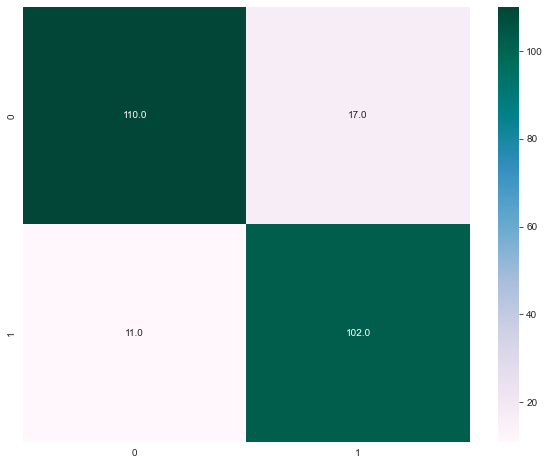

In [496]:
svc_model = SVC(kernel = 'linear', gamma = 'scale')

# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

print('Accuracy Score of Training Data: ', svc_model.score(X_train, y_train))

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score_linear = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score_linear)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm_SVC, annot = True, cmap = 'PuBuGn', fmt = '.1f')

**Observations:**
1. The accuracy score is 88%, we can say that the model is peforming well in balanced data.
2. If we see the classification report.  
    a. Precission : we are predicting 91% of 0 out of over all no Loan on card & 86% of times as Loan on card out of over all dataset.  
    b. Recall : out of over all dataset, our model can predict 87% of times correctly as No loan on card & 90% of times as Loan on card correctly.  
       Lets try with different modeling technique

In [497]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score_linear)

Precision Score : 0.88
Recall Score : 0.88
F1-Score : 0.88
Accuracy Score : 0.88


Accuracy Score of Training Data:  0.8472222222222222

Accuracy Score of Test Data: 0.8375

Classification Report of SVC Model:
                precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       127
         1.0       0.81      0.85      0.83       113

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240


Mean Absolute Error of SVC:
 0.1625

Confusion Matrix of SVC:
 [[105  22]
 [ 17  96]]


<AxesSubplot:>

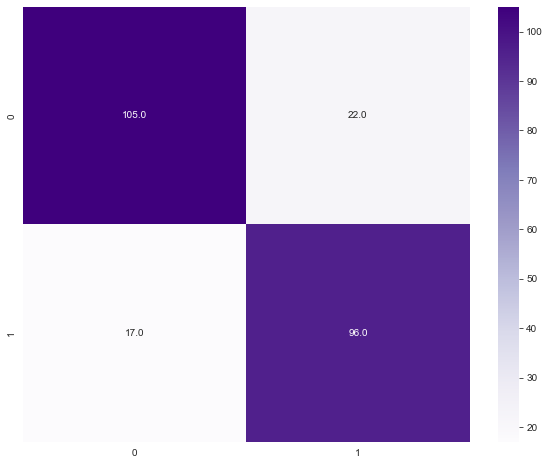

In [498]:
svc_model = SVC(kernel = 'rbf', gamma = 'scale')

# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

print('Accuracy Score of Training Data: ', svc_model.score(X_train, y_train))

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score_rbf = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score_rbf)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm_SVC, annot = True, cmap = 'Purples', fmt = '.1f')

**Observations:**
1. The accuracy score is 84%, we can say that the model is peforming well in balanced data.
2. If we see the classification report.  
    a. Precission : we are predicting 86% of 0 out of over all no Loan on card & 81% of times as Loan on card out of over all dataset.  
    b. Recall : out of over all dataset, our model can predict 83% of times correctly as No loan on card & 85% of times as Loan on card correctly.  
       Lets try with different modeling technique

In [500]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score_rbf)

Precision Score : 0.84
Recall Score : 0.84
F1-Score : 0.84
Accuracy Score : 0.84


Accuracy Score of Training Data:  0.8458333333333333

Accuracy Score of Test Data: 0.8166666666666667

Classification Report of SVC Model:
                precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       127
         1.0       0.82      0.78      0.80       113

    accuracy                           0.82       240
   macro avg       0.82      0.81      0.82       240
weighted avg       0.82      0.82      0.82       240


Mean Absolute Error of SVC:
 0.18333333333333332

Confusion Matrix of SVC:
 [[108  19]
 [ 25  88]]


<AxesSubplot:>

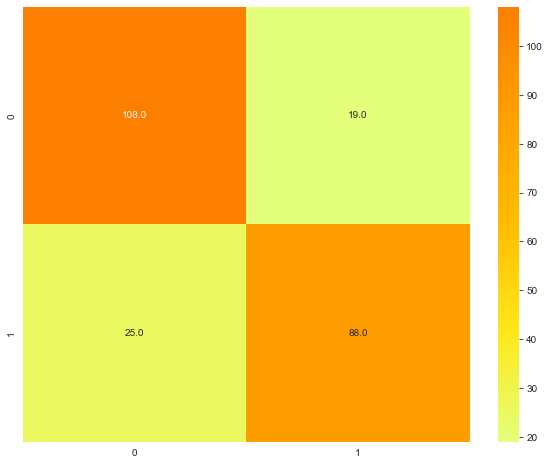

In [501]:
svc_model = SVC(kernel = 'poly', gamma = 'scale')

# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

print('Accuracy Score of Training Data: ', svc_model.score(X_train, y_train))

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score_poly = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score_poly)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm_SVC, annot = True, cmap = 'Wistia', fmt = '.1f')

**Observations:**
1. The accuracy score is 82%, we can say that the model is peforming well in balanced data.
2. If we see the classification report.  
    a. Precission : we are predicting 81% of 0 out of over all no Loan on card & 82% of times as Loan on card out of over all dataset.  
    b. Recall : out of over all dataset, our model can predict 85% of times correctly as No loan on card & 78% of times as Loan on card correctly.  
       Lets try with different modeling technique

In [503]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score_poly)

Precision Score : 0.82
Recall Score : 0.81
F1-Score : 0.82
Accuracy Score : 0.82


In [528]:
modellists = []
modellists.append(['Logistic Regression', modelLR_score * 100, recall_LR * 100, precision_LR * 100])
modellists.append(['K-Nearest Neighbour', modelKNN_score * 100, recall_KNN * 100, precision_KNN * 100])
modellists.append(['Support Vector Classifier linear', modelSVC_score_linear * 100, recall_SVC * 100, precision_SVC * 100])
modellists.append(['Support Vector Classifier rbf', modelSVC_score_rbf * 100, recall_SVC * 100, precision_SVC * 100])
modellists.append(['Support Vector Classifier poly', modelSVC_score_poly * 100, recall_SVC * 100, precision_SVC * 100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score', 'Recall Score', 'Precision Score'])
model_df

,Model,Accuracy Score,Recall Score,Precision Score
0,Logistic Regression,88.750000,88.882308,88.750000
1,K-Nearest Neighbour,87.500000,87.749983,87.686957
2,Support Vector Classifier linear,88.333333,81.457738,81.722999
3,Support Vector Classifier rbf,83.750000,81.457738,81.722999
4,Support Vector Classifier poly,81.666667,81.457738,81.722999


# Conclusion and improvisation

> **For this dataset, logistic regression  gives the best accuracy score follwed by Support Vector Classifier linear**

> **logistic regression gives best recall score follwed by K-Nearest Neighbour**	

> **logistic regression gives best precision score follwed by K-Nearest Neighbour**	

> **As I would prefer to choose Logistic regression (balanced data) model**

> **Precision & recall values are better predicting the protential customers**

> **Suggesting to collect data equally for both the classes**

> **Columns Like Zipcode and Customer since are not much effecting variable so these can be remove as it is increasing noise in     the data**

> **Few customers does't have credit card but those customer having loan on card. This data error can be avoided**  
   

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)